## 3 - MODELOS E LUCRO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from collections import Counter

from imblearn.over_sampling import SVMSMOTE


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',1000)

from plotnine import *
import plotnine

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

import time
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importar a base de treino tratada

df = pd.read_csv('base_tratada_final.csv')

In [3]:
pd.concat([df[['TARGET']].value_counts(),round(df[['TARGET']].value_counts(normalize=True)*100,2)],axis=1, keys=['Frequência', 'Porcentagem'])


,Frequência,Porcentagem
TARGET,,
0,68364,96.05
1,2815,3.95


<AxesSubplot:>

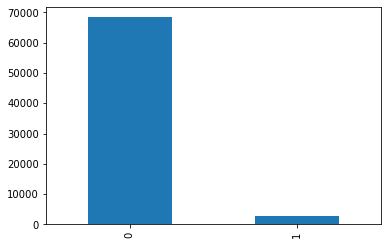

In [4]:
df['TARGET'].value_counts().plot.bar()

In [5]:
df.shape

(71179, 10)

In [6]:
df.head(2)

,TARGET,var15,inf_qtd_zeros,saldo_var30,saldo_var13,imp_op_var39_efect_ult1,var36,num_var30,num_op_var41_efect_ult3,num_op_var39_ult3
0,0,23.0,355.0,0.0,0.0,0.0,99,0,0,0
1,0,34.0,329.0,300.0,300.0,0.0,3,3,0,0


### DIVISÃO DOS DADOS 

In [7]:
#Divisão em dados de treino e teste

X = df.drop(['TARGET'],axis=1)
y = df['TARGET'].values
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=8888, stratify=y)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56943, 9)
(14236, 9)
(56943,)
(14236,)


In [9]:
# Faz o balanceamento

# Coleta os valores para X e y
X = X_train.copy()
y = y_train.copy()

# Distribuição da target

counter = Counter(y)
print(counter)

Counter({0: 54691, 1: 2252})


In [10]:
%%time 

# Over-sampling datase - bordline - Smote com SVM

# Distribuição da target
counter = Counter(y)
print(counter)

# Define o método de over-sampling
oversample = SVMSMOTE(random_state=8888)

# Transforma dataset

X, y = oversample.fit_resample(X,y)

# Distribuição da target após balancear
counter = Counter(y)
print(counter)

Counter({0: 54691, 1: 2252})
Counter({0: 54691, 1: 54691})
CPU times: total: 8.62 s
Wall time: 8.96 s


## ARVORE DE DECISÃO

In [11]:
%%time 



#Cria dicionário
param_grid = dict(
        
    
    max_depth=[3, 4, 5, 6, 7, 8, 9, 10],
    criterion = ['gini', 'entropy','log_loss'],
    min_samples_leaf = [100,150,200,250,300]

    
    
    
     # 8 * 3 * 5 = 120 
   
    
    
    
)

# Define o modelo
model = DecisionTreeClassifier()

# Define procedimento de avaliação
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=8888)

# Define grid search
grid = GridSearchCV(estimator = model, param_grid=param_grid,n_jobs=-1,cv =cv)



# Execução grid search
grid_result = grid.fit(X,y)

print('melhor: %f usando %s'% (grid_result.best_score_,grid_result.best_params_))

# Resumo de todas as configurações

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) com: %r' % (mean,stdev,param))

melhor: 0.899380 usando {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}
0.873001 (0.001397) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.873001 (0.001397) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 150}
0.873001 (0.001397) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 200}
0.873001 (0.001397) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 250}
0.873001 (0.001397) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 300}
0.877020 (0.003836) com: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 100}
0.877020 (0.003836) com: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 150}
0.877020 (0.003836) com: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 200}
0.877020 (0.003836) com: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 250}
0.877020 (0.003836) com: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 300}
0.882621 (0.001405) com: {'crite

In [12]:
#melhor: 0.899380 usando {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}

In [13]:
modelo_tree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, criterion =  'gini', random_state = 8888 )

# fit model no training data
modelo_tree.fit(X, y)


# make predictions for test data
y_pred = modelo_tree.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.65%


In [14]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.88      0.93     13673
     class 1       0.16      0.56      0.25       563

    accuracy                           0.87     14236
   macro avg       0.57      0.72      0.59     14236
weighted avg       0.95      0.87      0.90     14236



In [15]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação binária
    
    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa
    
    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
   
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

r1,r2 = get_confusion_matrix(reais=y_test, preditos=y_pred, labels=[1,0])

get_confusion_matrix(reais=y_test, preditos=y_pred, labels=[1,0])

array([[  316,   247],
       [ 1654, 12019]])

In [16]:
vp = r1[0]
fp = r1[1]
fn = r2[0]
vn = r2[1]
print('Verdadeiro Positivo:',vp)
print('Falso Positivo: ',fp)
print('Falso Negativo:',fn)
print('Verdadeiro Negativo:', vn)

Verdadeiro Positivo: 316
Falso Positivo:  247
Falso Negativo: 1654
Verdadeiro Negativo: 12019


In [17]:
# CALCULANDO O LUCRO 

Lucro_max = (90*vp) - (10*fp)

Lucro_max_cliente = (((90*vp) - (10*fp))/(vp+vn+fn+fp))

print('O lucro máximo possível é de',Lucro_max,'reais')
print('O lucro máximo esperado por cliente é de',Lucro_max_cliente,'reais')

O lucro máximo possível é de 25970 reais
O lucro máximo esperado por cliente é de 1.8242483843776343 reais


Threshold= 0.192982, G-means = 0.736


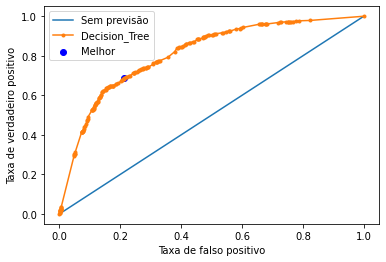

In [18]:
#Utilizando o modelo para a previsão

y_prob = modelo_tree.predict_proba(X_test)

#Probabilidade dos casos positivos
y_prob = y_prob[:, 1]

# Calculo da curva roc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

gmeans = np.sqrt(tpr * (1-fpr))

#o melhor corte

ix = np.argmax(gmeans)
print('Threshold= %f, G-means = %.3f' % (thresholds[ix], gmeans[ix]))

#Plotar o gráfico
plt.plot([0,1],[0,1], linestyle='-', label='Sem previsão')
plt.plot(fpr,tpr,marker = '.', label='Decision_Tree')
plt.scatter(fpr[ix], tpr[ix],marker='o',color='blue',label='Melhor')

plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.legend()

#Plotar
plt.show()




## RANDOM FOREST

In [19]:
%%time 



#Cria dicionário
param_grid = dict(
        
    n_estimators = [100,150,200,250],
    
    max_depth=[5, 6, 7, 8, 9, 10, 11, 12],
    
    
    min_samples_leaf = [100,150,200]

    # 4*8*3 = 96
)

# Define o modelo
model = RandomForestClassifier()

# Define procedimento de avaliação
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=8888)

# Define grid search
grid = GridSearchCV(estimator = model, param_grid=param_grid,n_jobs=-1,cv = cv)



# Execução grid search
grid_result = grid.fit(X,y)

print('melhor: %f usando %s'% (grid_result.best_score_,grid_result.best_params_))

# Resumo de todas as configurações

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) com: %r' % (mean,stdev,param))

melhor: 0.899472 usando {'max_depth': 12, 'min_samples_leaf': 100, 'n_estimators': 200}
0.883959 (0.001529) com: {'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 100}
0.884034 (0.001586) com: {'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 150}
0.883849 (0.001380) com: {'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 200}
0.883886 (0.001454) com: {'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 250}
0.883416 (0.001525) com: {'max_depth': 5, 'min_samples_leaf': 150, 'n_estimators': 100}
0.883193 (0.001368) com: {'max_depth': 5, 'min_samples_leaf': 150, 'n_estimators': 150}
0.883343 (0.001399) com: {'max_depth': 5, 'min_samples_leaf': 150, 'n_estimators': 200}
0.883303 (0.001389) com: {'max_depth': 5, 'min_samples_leaf': 150, 'n_estimators': 250}
0.882908 (0.001471) com: {'max_depth': 5, 'min_samples_leaf': 200, 'n_estimators': 100}
0.882911 (0.001340) com: {'max_depth': 5, 'min_samples_leaf': 200, 'n_estimators': 150}
0.882939 (0.001543) com: {'max_d

In [ ]:
# melhor: 0.899472 usando {'max_depth': 12, 'min_samples_leaf': 100, 'n_estimators': 200}

In [20]:
modelo_forest = RandomForestClassifier(max_depth = 12, min_samples_leaf = 100, n_estimators =  200, random_state=8888)

# fit model no training data
modelo_forest.fit(X, y)


# make predictions for test data
y_pred = modelo_forest.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.36%


In [21]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.89      0.93     13673
     class 1       0.17      0.58      0.27       563

    accuracy                           0.87     14236
   macro avg       0.58      0.73      0.60     14236
weighted avg       0.95      0.87      0.90     14236



In [22]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação binária
    
    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa
    
    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    
  
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

r1,r2 = get_confusion_matrix(reais=y_test, preditos=y_pred, labels=[1,0])

get_confusion_matrix(reais=y_test, preditos=y_pred, labels=[1,0])

array([[  325,   238],
       [ 1562, 12111]])

In [23]:
vp = r1[0]
fp = r1[1]
fn = r2[0]
vn = r2[1]
print('Verdadeiro Positivo:',vp)
print('Falso Positivo: ',fp)
print('Falso Negativo:',fn)
print('Verdadeiro Negativo:', vn)

Verdadeiro Positivo: 325
Falso Positivo:  238
Falso Negativo: 1562
Verdadeiro Negativo: 12111


In [24]:
# CALCULANDO O LUCRO 

Lucro_max = (90*vp) - (10*fp)

Lucro_max_cliente = (((90*vp) - (10*fp))/(vp+vn+fn+fp))

print('O lucro máximo possível é de',Lucro_max,'reais')
print('O lucro máximo esperado por cliente é de',Lucro_max_cliente,'reais')

O lucro máximo possível é de 26870 reais
O lucro máximo esperado por cliente é de 1.8874683899971902 reais


Threshold= 0.298688, G-means = 0.759


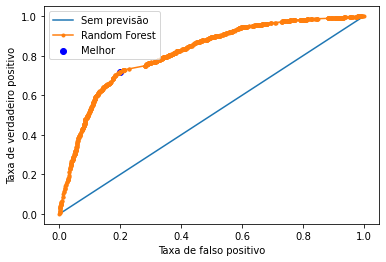

In [65]:
#Utilizando o modelo para a previsão

y_prob = modelo_forest.predict_proba(X_test)

#Probabilidade dos casos positivos
y_prob = y_prob[:, 1]

# Calculo da curva roc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

gmeans = np.sqrt(tpr * (1-fpr))

#o melhor corte

ix = np.argmax(gmeans)
print('Threshold= %f, G-means = %.3f' % (thresholds[ix], gmeans[ix]))

#Plotar o gráfico
plt.plot([0,1],[0,1], linestyle='-', label='Sem previsão')
plt.plot(fpr,tpr,marker = '.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix],marker='o',color='blue',label='Melhor')

plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.legend()

#Plotar
plt.show()




### Determinação do grupo 1

In [31]:
y_pred = (modelo_forest.predict_proba(X_test)[:,1] >= 0.29).astype(bool) 

In [32]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação binária
    
    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa
    
    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
  
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

r1,r2 = get_confusion_matrix(reais=y_test, preditos=y_pred, labels=[1,0])

get_confusion_matrix(reais=y_test, preditos=y_pred, labels=[1,0])

array([[  411,   152],
       [ 2925, 10748]])

In [33]:
vp = r1[0]
fp = r1[1]
fn = r2[0]
vn = r2[1]
print('Verdadeiro Positivo:',vp)
print('Falso Positivo: ',fp)
print('Falso Negativo:',fn)
print('Verdadeiro Negativo:', vn)

Verdadeiro Positivo: 411
Falso Positivo:  152
Falso Negativo: 2925
Verdadeiro Negativo: 10748


In [34]:
# CALCULANDO O LUCRO


Lucro_max = (90*vp) - (10*fp)

Lucro_max_cliente = (((90*vp) - (10*fp))/(vp+vn+fn+fp))

print('O lucro máximo possível é de',Lucro_max,'reais')
print('O lucro máximo esperado por cliente é de',Lucro_max_cliente,'reais')

O lucro máximo possível é de 35470 reais
O lucro máximo esperado por cliente é de 2.4915706659173926 reais


# Questão 1

### O maior lucro foi do modelo de Random forest com um total de 26.870 reais 1,89 reais por cliente

# Questão 2

### Com o threshold da questão anterior no modelo de Random forest de 0.29, vamos utilizar o modelo para fazer a previsão na base de teste, a este grupo temos o máximo do lucro, denominado grupo 1. Como podemos acompanhar abaixo: 
### O lucro máximo é de 35.470 reais neste grupo 1
### O lucro máximo esperado por cliente é de 2.49 reais neste grupo 1. Isto é, todos acima do threshold de 0.29 serão o grupo 1

# Questão 3 - Clusterização

#### Estamos trabalhando com variáveis numéricas e categóricas, logo vamos utilizar o k-prototype para essa tarefa que permite trabalhar com os dois tipos de dados ao mesmo tempo. Antes de iniciar a clusterização, é necessário transformar a escala dos dados, no caso de k-prototype, vamos utilizar MinMaxScaler para transformar a escala das variáveis numéricas para ficarem entre 0 e 1, pois assim será comparável com a distância de hamming das variáveis categóricas. 

### Quero dividir em grupos naturais com os maiores lucros esperados, e isso vai acontecer com o grupo que o modelo classificou como 1 e de fato era 1



### Criar a base e extrair o grupo que o modelo classificou como 1 e de fato era 1

In [35]:
df_test_t = pd.DataFrame(y_test, columns=['test'])

In [36]:
df_test_t.reset_index(inplace=True)

In [37]:
df_test_t.drop(columns = ['index'],inplace=True)

In [38]:
df_test_p = pd.DataFrame(y_pred, columns=['TARGET_pred'])

In [39]:
df_test_p.reset_index(inplace=True)

In [40]:
def tf(x):
    if x == False:
        return 0
    else: 
        return 1

In [41]:
df_test_p['pred'] = df_test_p['TARGET_pred'].apply(lambda x: tf(x))

In [42]:
df_test_p.drop(columns=['TARGET_pred'],inplace=True)

In [43]:
df_test_p.drop(columns = ['index'],inplace=True)

In [44]:
X_test.reset_index(inplace=True)

In [45]:
X_test.drop(columns = ['index'],inplace=True)

In [46]:
df_clus = pd.concat([X_test,df_test_t,df_test_p],axis=1)

In [47]:
df_clus

,var15,inf_qtd_zeros,saldo_var30,saldo_var13,imp_op_var39_efect_ult1,var36,num_var30,num_op_var41_efect_ult3,num_op_var39_ult3,test,pred
0,24.0,355.0,0.00,0.0,0.0,99,0,0,0,0,0
1,23.0,345.0,3.00,0.0,0.0,3,3,0,0,0,0
2,23.0,338.0,3.00,0.0,0.0,3,3,0,0,0,0
3,26.0,340.0,3.00,0.0,0.0,3,3,0,0,0,0
4,23.0,340.0,3.00,0.0,0.0,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14231,23.0,307.0,231.00,0.0,570.0,1,3,12,33,0,0
14232,38.0,318.0,30006.00,0.0,0.0,1,6,0,0,0,0
14233,24.0,340.0,3.00,0.0,0.0,3,3,0,0,0,0
14234,47.0,314.0,45003.00,45000.0,0.0,3,6,0,0,0,0


In [48]:
df_clus2 = df_clus[df_clus['test'] == 1 ]

In [49]:
df_clust =  df_clus2[df_clus2['pred'] == 1 ]

In [50]:
df_clust.shape

(411, 11)

In [51]:
df_clust.drop(columns = ['test','pred'],inplace=True)

In [52]:
df_clust.head(2)

,var15,inf_qtd_zeros,saldo_var30,saldo_var13,imp_op_var39_efect_ult1,var36,num_var30,num_op_var41_efect_ult3,num_op_var39_ult3
11,50.0,330.0,4.77,0.0,0.0,3,3,0,6
25,37.0,343.0,0.00,0.0,0.0,2,0,0,0


In [53]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 11 to 14180
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   var15                    411 non-null    float64
 1   inf_qtd_zeros            411 non-null    float64
 2   saldo_var30              411 non-null    float64
 3   saldo_var13              411 non-null    float64
 4   imp_op_var39_efect_ult1  411 non-null    float64
 5   var36                    411 non-null    int64  
 6   num_var30                411 non-null    int64  
 7   num_op_var41_efect_ult3  411 non-null    int64  
 8   num_op_var39_ult3        411 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 32.1 KB


In [54]:
df_cat = df_clust.select_dtypes(include=['int64'])

In [55]:
# Padronização  

padronizar = df_clust.select_dtypes(include=['float64'])

var  = MinMaxScaler()
df_num  = var.fit_transform(padronizar)

In [56]:
df_num2=pd.DataFrame(df_num,columns=padronizar.columns)
df_num2.head()

,var15,inf_qtd_zeros,saldo_var30,saldo_var13,imp_op_var39_efect_ult1
0,0.380282,0.666667,0.359897,0.0,0.0
1,0.197183,0.811111,0.359305,0.0,0.0
2,0.225352,0.755556,0.359305,0.0,0.0
3,0.309859,0.500000,0.370625,0.0,0.0
4,0.366197,0.800000,0.359677,0.0,0.0


In [57]:
df_cat.reset_index(inplace=True)

In [58]:
df_cat.drop(columns = ['index'],inplace=True)

In [59]:
df_cluster = pd.concat([df_cat,df_num2],axis=1)

In [60]:
SSE = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(df_cluster)
    SSE.append(kmeans.inertia_)

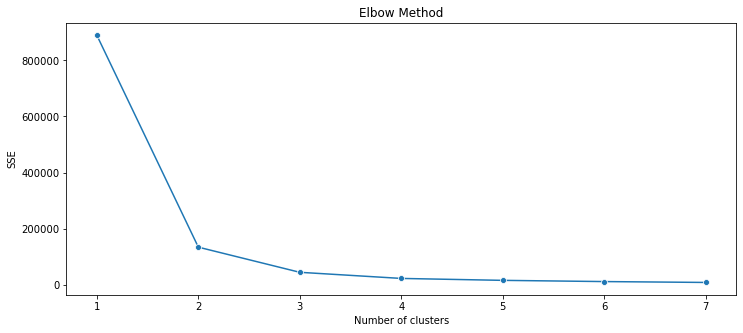

In [61]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1, 8), SSE,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [62]:
kproto_clusters=KPrototypes(n_clusters=3,random_state=8,init="Cao")
result_cluster=kproto_clusters.fit_predict(df_cluster,categorical=[1])

In [63]:
df_cluster['Clusters']=result_cluster
df_cluster['Clusters'].value_counts()

0    312
1     73
2     26
Name: Clusters, dtype: int64

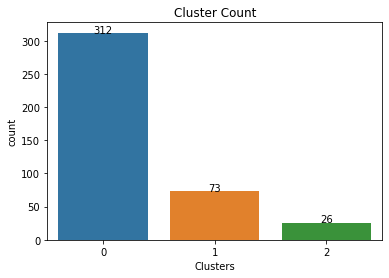

In [64]:
ax=sns.countplot(x=df_cluster.Clusters)
for index, row in pd.DataFrame(df_cluster['Clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

## Questão 3 - Lucro
## Grupo 1 = 90*312 = 28.080
## Grupo 2 = 90*73 = 6.570
## Grupo 3 = 90*26 = 2.340